# Shapash

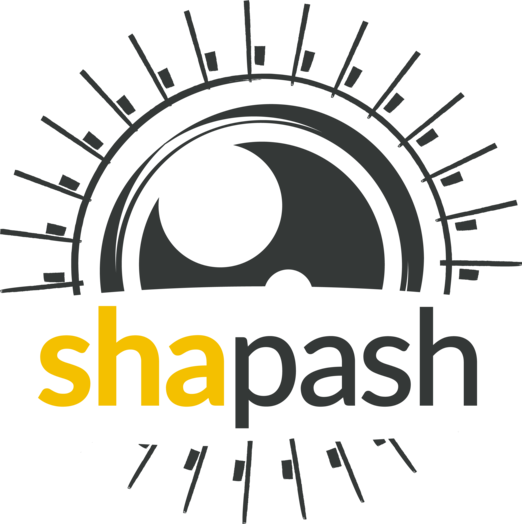

Shapash is a Python library which aims to make machine learning interpretable and understandable to everyone. Shapash provides several types of visualization which displays explicit labels that everyone can understand. Data Scientists can more easily understand their models and share their results. End users can understand the decision proposed by a model using a summary of the most influential criteria. 

In [31]:
# lets see the how Shapash is working
# for that we are using searbon inbuilt dataset of 'Tips'
import seaborn as sns


In [32]:
df=sns.load_dataset('tips')

In [33]:
df

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4
...,...,...,...,...,...,...,...
239,29.03,5.92,Male,No,Sat,Dinner,3
240,27.18,2.00,Female,Yes,Sat,Dinner,2
241,22.67,2.00,Male,Yes,Sat,Dinner,2
242,17.82,1.75,Male,No,Sat,Dinner,2


In [34]:
### lets divide the dataset into independent and dependent dataset
y=df['tip'] # dependent variable
X=df[df.columns.difference(['tips'])] # independent variables

In [35]:
X.head()

,day,sex,size,smoker,time,tip,total_bill
0,Sun,Female,2,No,Dinner,1.01,16.99
1,Sun,Male,3,No,Dinner,1.66,10.34
2,Sun,Male,3,No,Dinner,3.50,21.01
3,Sun,Male,2,No,Dinner,3.31,23.68
4,Sun,Female,4,No,Dinner,3.61,24.59


In [36]:
y.head()

0    1.01
1    1.66
2    3.50
3    3.31
4    3.61
Name: tip, dtype: float64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   total_bill  244 non-null    float64 
 1   tip         244 non-null    float64 
 2   sex         244 non-null    category
 3   smoker      244 non-null    category
 4   day         244 non-null    category
 5   time        244 non-null    category
 6   size        244 non-null    int64   
dtypes: category(4), float64(2), int64(1)
memory usage: 7.4 KB


In [38]:
# let convert category features into label incoded.
X['day']=X['day'].cat.codes
X['sex']=X['sex'].cat.codes
X['smoker']=X['smoker'].cat.codes
X['time']=X['time'].cat.codes

In [39]:
X.head()

,day,sex,size,smoker,time,tip,total_bill
0,3,1,2,1,1,1.01,16.99
1,3,0,3,1,1,1.66,10.34
2,3,0,3,1,1,3.50,21.01
3,3,0,2,1,1,3.31,23.68
4,3,1,4,1,1,3.61,24.59


In [40]:
### Train test split
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.75,random_state=1)

In [41]:
## import the machine learning algorithm

from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators=200).fit(X_train,y_train)

**Lets understand our model with Shapash**

We are using the SmartExplainer object from shapash
- it allows the users to understand the model works.
-  this object useed only for data mining steps.shapash provides the another object for deployment.

In [42]:
from shapash.explainer.smart_explainer import SmartExplainer

In [43]:
xpl=SmartExplainer()

In [44]:
xpl.compile(x=X_test, model=regressor)

Backend: Shap TreeExplainer


**Lets Understand the results of your trained model.**
we can get the summary of the expalnation of the model results.
- we can choose the 3 most contributive feautures.
- we used a wording to get features names more understandable in operational case.

In [45]:
app = xpl.run_app(title_story='Tips Dataset')

C:\Users\pravi\AppData\Roaming\Python\Python37\site-packages\pandas\core\frame.py:1554: FutureWarning:

Using short name for 'orient' is deprecated. Only the options: ('dict', list, 'series', 'split', 'records', 'index') will be used in a future version. Use one of the above to silence this warning.

INFO:root:Your Shapash application run on http://DESKTOP-58DD5UR:8050/


Dash is running on http://0.0.0.0:8050/



INFO:root:Use the method .kill() to down your app.


Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/

Dash is running on http://0.0.0.0:8050/



INFO:shapash.webapp.smart_app:Dash is running on http://0.0.0.0:8050/



 * Serving Flask app "shapash.webapp.smart_app" (lazy loading)
 * Environment: production
   Use a production WSGI server instead.
 * Debug mode: off


INFO:werkzeug: * Running on http://0.0.0.0:8050/ (Press CTRL+C to quit)
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:30] "GET / HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:31] "GET /_dash-dependencies HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:31] "GET /_dash-layout HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:33] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:33] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:33] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:33] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:33] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:33] "POST /_dash-update-component HTTP/1.1" 200 -
INFO:werkzeug:192.168.1.12 - - [07/Apr/2021 12:30:33] "POST /_dash-

In [46]:

predictor = xpl.to_smartpredictor()

In [47]:

predictor.save('./predictor.pkl')


In [48]:
from shapash.utils.load_smartpredictor import load_smartpredictor
predictor_load = load_smartpredictor('./predictor.pkl')

**Make a prediction with your SmartPredictor**

In order to make new predictions and summarize local explainability of your model on new datasets, you can use the method add_input of the SmartPredictor.

- The add_input method is the first step to add a dataset for prediction and explainability.
- It checks the structure of the dataset, the prediction and the contribution if specified.
- It applies the preprocessing specified in the initialisation and reorder the features with the order used by the model. (see the documentation of this method)
- In API mode, this method can handle dictionnaries data which can be received from a GET or a POST request.
- Add data
- The x input in add_input method doesn't have to be encoded, add_input applies preprocessing.

In [49]:
predictor_load.add_input(x=X, ypred=y)

In [50]:
detailed_contributions = predictor_load.detail_contributions()

In [51]:
detailed_contributions.head()

,tip,day,sex,size,smoker,time,tip,total_bill
0,1.01,0.000563,-0.001169,0.000726,0.005103,-0.000354,-1.892026,0.005689
1,1.66,0.000106,0.000900,-0.000004,0.000447,0.000040,-1.317424,-0.005382
2,3.50,0.000283,0.000361,-0.000909,0.000411,0.000171,0.532448,-0.003931
3,3.31,-0.001926,0.000301,-0.000343,0.000648,0.000045,0.316514,-0.003257
4,3.61,-0.000034,0.000104,0.001601,0.000908,0.000146,0.612534,-0.003677


**Summarize explanability of the predictions**
- You can use the summarize method to summarize your local explainability
- This summary can be configured with modify_mask method so that you have explainability that meets your operational needs.

In [52]:
predictor_load.modify_mask(max_contrib=3)

In [53]:
explanation = predictor_load.summarize()

In [54]:
explanation.head()

,tip,feature_1,value_1,contribution_1,feature_2,value_2,contribution_2,feature_3,value_3,contribution_3
0,1.01,tip,1.01,-1.892026,total_bill,16.99,0.005689,smoker,1.0,0.005103
1,1.66,tip,1.66,-1.317424,total_bill,10.34,-0.005382,sex,0.0,0.0009
2,3.50,tip,3.5,0.532448,total_bill,21.01,-0.003931,size,3.0,-0.000909
3,3.31,tip,3.31,0.316514,total_bill,23.68,-0.003257,day,3.0,-0.001926
4,3.61,tip,3.61,0.612534,total_bill,24.59,-0.003677,size,4.0,0.001601
